<a href="https://colab.research.google.com/github/2303a52163/Generative-AI-2025/blob/main/2303A52163_Gen_AI_Assignment_No_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Question**

1. (1 ponto) Design a multi-layer ANN architecture with one input, one hidden, and one output
layer. Assume a linear activation function in the output layer and a sigmoid activation function
in the hidden layer.
• Write Python code for a backpropagation algorithm with gradient descent optimization to
update weights and bias parameters of the ANN model with training data shown in Table
1.
• Calculate the mean square error with training and testing data shown in Table 2.
• Write Python code that reads the input data [x1 and x2] from the user. Predict the output
with deployed ANN model

Tabela 1:

Training Data

x1 x2 y

1 2 0.4140

2 3 0.4611

5 6 0.5501

6 7 0.5656

7 8 0.5765

8 9 0.5840

Tabela 2:

Test Data

x1 x2 y

3 4 0.4992

4 5 0.5285



In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))


In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z1, A1, Z2

In [7]:
def backpropagation(X, Y, Z1, A1, Z2, learning_rate=0.01):
    global W1, b1, W2, b2

    # Compute errors
    error = Z2 - Y
    dW2 = np.dot(A1.T, error) / len(X)
    db2 = np.mean(error, axis=0)

    # Hidden layer error
    dA1 = np.dot(error, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / len(X)
    db1 = np.mean(dZ1, axis=0)

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


Epoch 0, Loss: 0.65857
Epoch 100, Loss: 0.05230
Epoch 200, Loss: 0.04526
Epoch 300, Loss: 0.04056
Epoch 400, Loss: 0.03654
Epoch 500, Loss: 0.03310
Epoch 600, Loss: 0.03017
Epoch 700, Loss: 0.02767
Epoch 800, Loss: 0.02551
Epoch 900, Loss: 0.02365


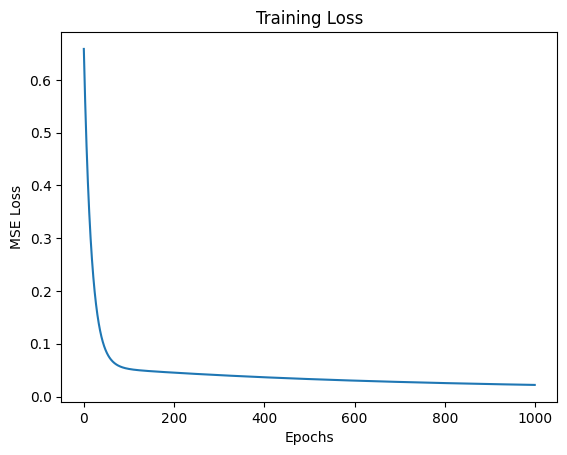

In [8]:
# Training Data (Table 1)
X_train = np.array([[1, 2], [2, 3], [5, 6], [6, 7], [7, 8], [8, 9]])
Y_train = np.array([[0.4140], [0.4611], [0.5501], [0.5656], [0.5765], [0.5840]])

epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    Z1, A1, Z2 = forward_propagation(X_train)
    loss = np.mean((Z2 - Y_train) ** 2)
    losses.append(loss)
    backpropagation(X_train, Y_train, Z1, A1, Z2, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.5f}")


plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.show()


In [9]:
# Test Data (Table 2)
X_test = np.array([[3, 4], [4, 5]])
Y_test = np.array([[0.4992], [0.5285]])

_, _, Y_pred_test = forward_propagation(X_test)
mse_test = np.mean((Y_pred_test - Y_test) ** 2)

print(f"Test MSE: {mse_test:.5f}")


Test MSE: 0.00109


In [13]:
def predict():
    x1 = float(input("Enter x1: "))
    x2 = float(input("Enter x2: "))
    X_new = np.array([[x1, x2]])
    _, _, Y_new = forward_propagation(X_new)
    print(f"Predicted Output: {Y_new[0, 0]:.5f}")

predict()

Enter x1: 4
Enter x2: 5
Predicted Output: 0.50014
